<a href="https://colab.research.google.com/github/t110318079/Vic_Detection/blob/main/IQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo for IQA-PyTorch


<a href="https://colab.research.google.com/drive/14J3KoyrjJ6R531DsdOy5Bza5xfeMODi6?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>
[![GitHub Stars](https://img.shields.io/github/stars/chaofengc/IQA-PyTorch?style=social)](https://github.com/chaofengc/IQA-PyTorch)
[![PyPI](https://img.shields.io/pypi/v/pyiqa)](https://pypi.org/project/pyiqa/)
![visitors](https://visitor-badge.laobi.icu/badge?page_id=chaofengc/IQA-PyTorch)

[Installation](#scrollTo=tcVxXhwr8yk0)

[Basic Usage](#scrollTo=UcOqHOJp9aZF)

>[Create metric function](#scrollTo=UcOqHOJp9aZF)

>[Test with paths as input](#scrollTo=1X5VA8xn_mAJ)

>[Test with tensor inputs](#scrollTo=t4VFP1SQBuy9)

>[Test with directory inputs (FID score)](#scrollTo=oN_sw_jdGTVk)

# Installation

In [ ]:
!git clone https://github.com/chaofengc/IQA-PyTorch.git
%cd /content/IQA-PyTorch
!pip install -r requirements.txt
!python setup.py develop

Cloning into 'IQA-PyTorch'...
remote: Enumerating objects: 2332, done.
remote: Counting objects: 100% (440/440), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 2332 (delta 259), reused 365 (delta 236), pack-reused 1892
Receiving objects: 100% (2332/2332), 24.54 MiB | 14.04 MiB/s, done.
Resolving deltas: 100% (1576/1576), done.
/content/IQA-PyTorch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 45.2 MB/s 
     |████████████████████████████████| 548 kB 62.8 MB/s 
     |████████████████████████████████| 190 kB 68.2 MB/s 
     |████████████████████████████████| 41 kB 591 kB/s 
     |████████████████████████████████| 182 kB 14.3 MB/s 
running develop
running egg_info
creating pyiqa.egg-info
writing pyiqa.egg-info/PKG-INFO
writing dependency_links to pyiqa.egg-info/dependency_links.txt
writing requirements to pyiqa.egg-info/requires.txt
writing top-level names to pyiqa.e

# Basic Usage

### Create metric function

In [ ]:
import pyiqa
import torch

# List available models
print(pyiqa.list_models())

['ahiq', 'brisque', 'ckdn', 'cw_ssim', 'dbcnn', 'dists', 'fid', 'fsim', 'gmsd', 'ilniqe', 'lpips', 'lpips-vgg', 'mad', 'maniqa', 'ms_ssim', 'musiq', 'musiq-ava', 'musiq-koniq', 'musiq-paq2piq', 'musiq-spaq', 'nima', 'niqe', 'nlpd', 'nrqm', 'paq2piq', 'pi', 'pieapp', 'psnr', 'psnry', 'ssim', 'ssimc', 'vif', 'vsi']


In [ ]:
# create metric function, for example lpips
lpips_metric = pyiqa.create_metric('lpips').cuda()
niqe_metric = pyiqa.create_metric('niqe').cuda()
fid_metric = pyiqa.create_metric('fid')

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Downloading: "https://github.com/chaofengc/IQA-Toolbox-Python/releases/download/v0.1-weights/LPIPS_v0.1_alex-df73285e.pth" to /root/.cache/torch/hub/checkpoints/LPIPS_v0.1_alex-df73285e.pth



  0%|          | 0.00/5.87k [00:00<?, ?B/s]

Loading pretrained model LPIPS from /root/.cache/torch/hub/checkpoints/LPIPS_v0.1_alex-df73285e.pth
Downloading: "https://github.com/chaofengc/IQA-PyTorch/releases/download/v0.1-weights/niqe_modelparameters.mat" to /root/.cache/torch/hub/checkpoints/niqe_modelparameters.mat



  0%|          | 0.00/8.15k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth



  0%|          | 0.00/91.2M [00:00<?, ?B/s]

Loading pretrained model Inception3 from /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth


### Test with paths as input

LPIPS score: 0.7237
NIQE score: 15.6538


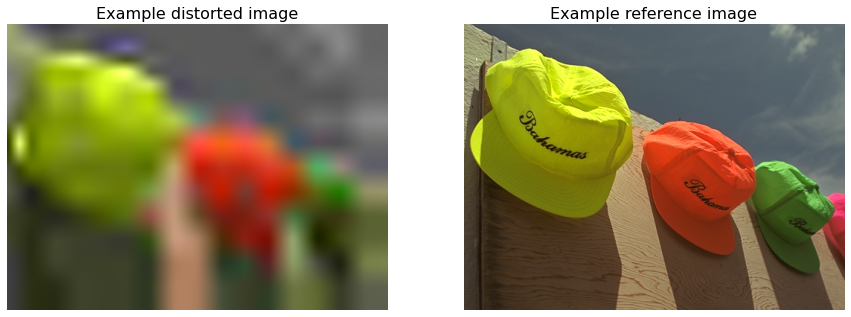

In [ ]:
# Show example images
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Example distorted image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('Example reference image', fontsize=16)
ax2.axis('off')
ax1.imshow(Image.open('./ResultsCalibra/dist_dir/I03.bmp'))
ax2.imshow(Image.open('./ResultsCalibra/ref_dir/I03.bmp'))

# LPIPS takes two corresponding images: (distorted image, reference image)
lpips_score = lpips_metric('./ResultsCalibra/dist_dir/I03.bmp', './ResultsCalibra/ref_dir/I03.bmp')
print(f'LPIPS score: {lpips_score:.4f}')

# NIQE takes the distortion image
niqe_score = niqe_metric('./ResultsCalibra/dist_dir/I03.bmp')
print(f'NIQE score: {niqe_score:.4f}')

### Test with tensor inputs

In [ ]:
from pyiqa import imread2tensor

dist_img_tensor = imread2tensor('./ResultsCalibra/dist_dir/I03.bmp').unsqueeze(0).cuda()
ref_img_tensor = imread2tensor('./ResultsCalibra/ref_dir/I03.bmp').unsqueeze(0).cuda()

In [ ]:
lpips_score = lpips_metric(dist_img_tensor, ref_img_tensor)
print(f'LPIPS score: {lpips_score:.4f}')

niqe_score = niqe_metric(dist_img_tensor, ref_img_tensor)
print(f'NIQE score: {niqe_score:.4f}')

LPIPS score: 0.7237
NIQE score: 15.6538


### Test with directory inputs (FID score)

In [ ]:
# FID takes two directory inputs
fid_score = fid_metric('./ResultsCalibra/dist_dir/', './ResultsCalibra/ref_dir')
print(f'FID score: {fid_score:.4f}')

# We use clean-fid by default, you may also change to original fid by setting the `mode` parameter
legacy_fid_score = fid_metric('./ResultsCalibra/dist_dir/', './ResultsCalibra/ref_dir', mode='legacy_pytorch')
print(f'FID score: {legacy_fid_score:.4f}')


Found 5 images in the folder ./ResultsCalibra/dist_dir/


FID : 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Found 5 images in the folder ./ResultsCalibra/ref_dir


FID ref_dir: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


FID score: 220.5819
Found 5 images in the folder ./ResultsCalibra/dist_dir/


FID : 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 5 images in the folder ./ResultsCalibra/ref_dir


FID ref_dir: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


FID score: 225.3679
